In [1]:
import pandas as pd
import numpy as np
import collections
import ast
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("analysed cc - first pass.csv")
#contains the dictionary where keys are specific key words, and values are a tuple of (x_bar, n)
kwk = ['lecture',
 'material',
 'information',
 'organization',
 'disorganized',
 'concepts',
 'discussion',
 'memorization',
 'workload',
 'read',
 'exams',
 'presentation',
 'homework',
 'labs',
 'textbook',
 'curve',
 'recitation']
key_words = {i:[0,0,0,0,0] for i in kwk}

#df['tweet'].info()

In [3]:
df.head()

,Unnamed: 0,Course Key,Comments,tweet,classifiedhappy,classifiedlearning
0,0,200710-11026,3.5 out of 5 stars,"['3.5', 'out', 'of', '5', 'star']",5,5
1,1,200710-11026,A lot of reading and sometimes it was boring. ...,"['a', 'lot', 'of', 'read', 'and', 'sometimes',...",1,1
2,2,200710-11026,"a lot of reading on your own part, but interes...","['a', 'lot', 'of', 'read', 'on', 'your', 'own'...",5,5
3,3,200710-11026,"BIOS 201 is a great class,not only because of ...","['bios', '201', 'be', 'a', 'great', 'class', '...",4,2
4,4,200710-11026,"Bios 201 was an organized, well taught class. ...","['201', 'be', 'an', 'organize', 'well', 'teach...",4,2


(array([ 1303.,     0.,  1081.,     0.,     0.,  1430.,     0.,  3544.,
            0., 11420.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

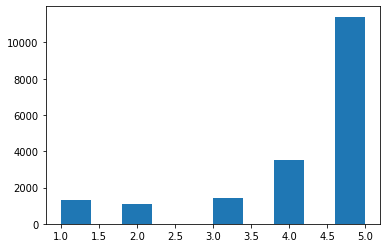

In [7]:
plt.hist(df["classifiedhappy"].values)

In [8]:
# function that goes in lambda expression below
def update_weight_running_average(input): # input is a tuple where input[0] is list of words and input[1] is rating
    for x in ast.literal_eval(input[0]):
        #print(x)
        if x in key_words: # key_words dictionary
            key_words[x][0] = (key_words[x][0] * key_words[x][1] + int(input[1])) / (key_words[x][1] + 1)
            key_words[x][1] += 1

In [9]:
def update_weight(input): # input is a tuple where input[0] is list of words and input[1] is rating
    for x in ast.literal_eval(input[0]):
        #print(x)
        if x in key_words: # key_words dictionary
            key_words[x][int(input[1]) - 1] += 1

In [30]:
pd.unique(df['Course Key'])

array(['200710-11026', '200720-20006', '200720-20119', '200720-20472',
       '200720-20506', '200720-20718', '200720-20867', '200810-10446',
       '200810-10790', '200810-10988', '200810-10990', '200810-11026',
       '200810-11031', '200810-11048', '200810-11143', '200810-11778',
       '200810-11790', '200820-20006', '200820-20119', '200820-20121',
       '200820-20472', '200820-20531', '200820-20717', '200820-20841',
       '200910-10446', '200910-10790', '200910-10988', '200910-11026',
       '200910-11031', '200910-11048', '200910-11144', '200910-11146',
       '200910-11778', '200910-11790', '200920-20119', '200920-20460',
       '200920-20717', '201010-10477', '201010-10791', '201010-10988',
       '201010-10990', '201010-11026', '201010-11031', '201010-11048',
       '201010-11777', '201010-11778', '201010-11790', '201020-20119',
       '201020-20121', '201020-20459', '201020-20460', '201020-20472',
       '201020-20506', '201020-20531', '201020-20707', '201020-20710',
      

,201710-10703,201810-10703
material,1.000000,0.644118
homework,0.425951,0.223529
lecture,0.425951,0.388235
exams,0.364130,1.000000
read,0.298913,0.131092
curve,0.239130,0.223529
discussion,0.179348,0.141176
information,0.152174,0.158824
textbook,0.134511,0.094118
concepts,0.115082,0.103361


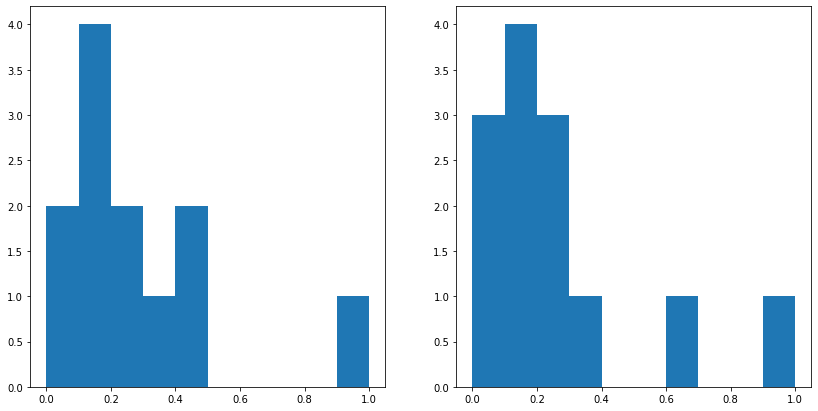

In [56]:
# for ck in pd.unique(df['Course Key']):
crns = ['201710-10703', '201810-10703']
odb = pd.DataFrame()
plt.figure(figsize=(7*len(crns),7))
for ck in crns:
    tousedf = df[df['Course Key'] == ck]
    key_words = {i:[0,0,0,0,0] for i in kwk}
    for index, row in tousedf[["tweet", "classifiedhappy"]].iterrows():
        update_weight((row['tweet'], row['classifiedhappy']))
    for x in list(key_words):
        # key_words[x][0] -= 3
        if key_words[x] == [0,0,0,0,0]:
            del key_words[x]
    total_review_numbers = [0,0,0,0,0]
    for key, value in key_words.items():
        total_review_numbers = [i + j for i, j in zip(total_review_numbers, value)]

    word_Usage = {}
    for x, y in key_words.items():
        word_Usage[x] = [0,0,0,0,0]
        for i in range(len(y)):
            if total_review_numbers[i] != 0:
                word_Usage[x][i] = y[i] * 1.0 / total_review_numbers[i]
            else:
                word_Usage[x][i] = 0
        word_Usage[x] = max(word_Usage[x])

    mx = max(word_Usage.values())
    mn = min(word_Usage.values())

    for key, value in word_Usage.items():
        word_Usage[key] = (value - mn) * 1.0 / (mx - mn)
        
    if (len(word_Usage) > 1):

        plt.subplot(1,len(crns),crns.index(ck)+1)
        plt.hist(word_Usage.values())
        odb[ck] = pd.Series(word_Usage).sort_values(ascending = False)
odb

 reading, material, and homework got a lot lower under tour
curve and exam got a lot higher
